In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## ResNet from Scratch

In [3]:
# 1. Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32")/255.0
x_tewst = x_test.astype("float32")/255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [20]:
 # 2. Define Residual Block
def residual_block(x, filters, downsample=False):
    shortcut = x
    strides = (2,2) if downsample else (1,1)

    # First Conv Layer
    x = layers.Conv2D(filters, (3,3), strides=strides, padding="same", activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Second Conv Layer
    x = layers.Conv2D(filters, (3,3), padding="same")(x)
    x = layers.BatchNormalization()(x)

    # Adjust Shortcut if dimensions change
    if downsample: 
        shortcut = layers.Conv2D(filters, (1,1), strides=(2,2), padding="same")(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Add shortcut to main path
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

In [21]:
# 3, Build Small ResNet Model
def build_resnet(): 
    inputs = layers.Input(shape=(32, 32, 3))

    x = layers.Conv2D(32, (3,3), padding="same", activation='relu')(inputs)
    x = layers.BatchNormalization()(x)

    # Residual Blocks
    x = residual_block(x, 32)
    x = residual_block(x, 32)
    x = residual_block(x, 64, downsample=True)
    x = residual_block(x, 64)
    x = residual_block(x, 128, downsample=True)
    x = residual_block(x, 128)

    # Classificaton Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs, outputs)

    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

    return model


In [22]:
# 4. Train Model
model = build_resnet()
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=1)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 146s 213ms/step - accuracy: 0.4502 - loss: 1.5058 - val_accuracy: 0.4746 - val_loss: 1.5115
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 210ms/step - accuracy: 0.6274 - loss: 1.0586 - val_accuracy: 0.6415 - val_loss: 1.0362
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 214ms/step - accuracy: 0.7046 - loss: 0.8603 - val_accuracy: 0.7029 - val_loss: 0.8510
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 214ms/step - accuracy: 0.7566 - loss: 0.7246 - val_accuracy: 0.6897 - val_loss: 0.9136
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 212ms/step - accuracy: 0.7938 - loss: 0.6268 - val_accuracy: 0.7169 - val_loss: 0.8353
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.8191 - loss: 0.5418 - val_accuracy: 0.7684 - val_loss: 0.6785
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 211ms/step - accuracy: 0.8440 - loss: 0.4737 - val_accuracy: 0.7761 - val_loss: 0.6904
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.8623 -

In [23]:
# 5. Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 0.1622


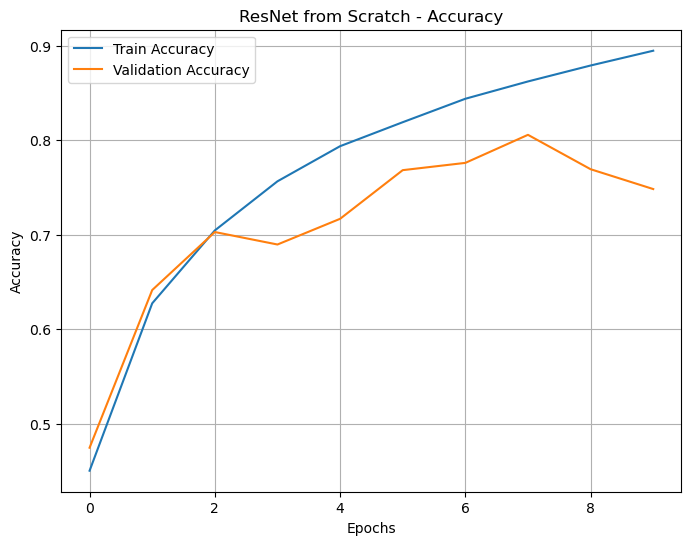

In [28]:
# 6. Plot Accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label= 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("ResNet from Scratch - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

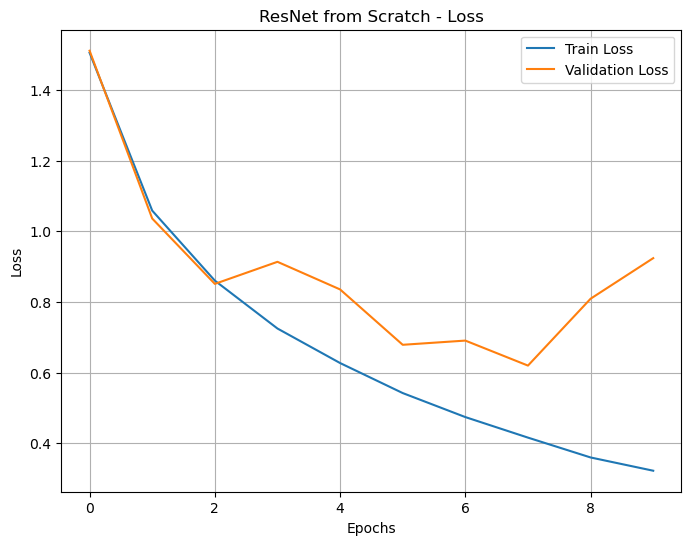

In [29]:
# 7. Plot Loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label= 'Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("ResNet from Scratch - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# 8. Predictions 
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


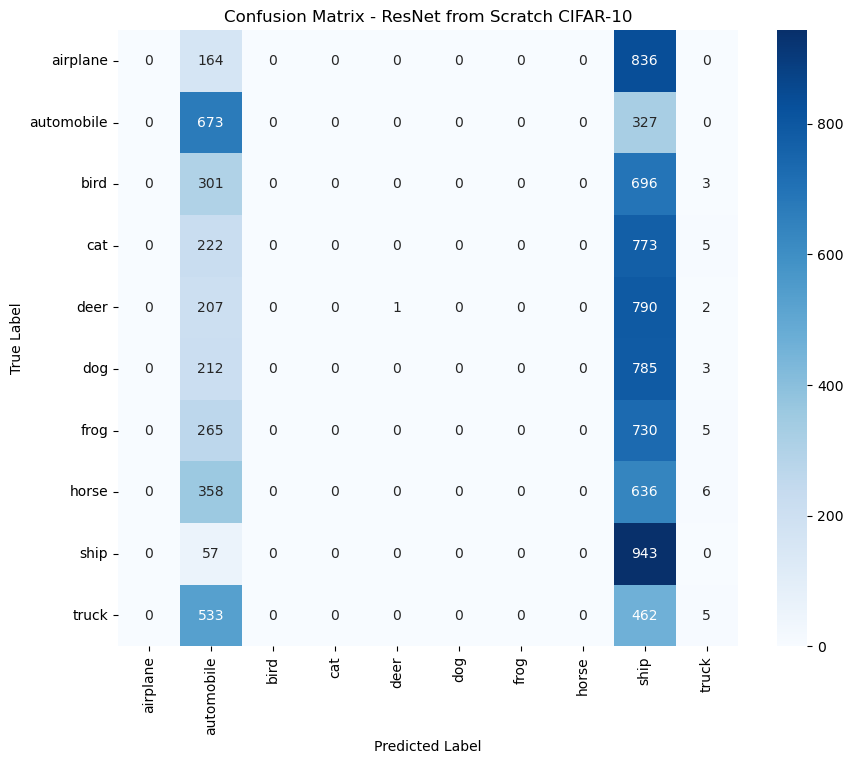

In [32]:
# 9. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - ResNet from Scratch CIFAR-10")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()